# Capstone 911 calls complete Analysis



In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline

In [2]:
file = ("C:\\Users\\Ravi Nadageri\\Documents\\Github_projects\\911.csv")

df = pd.read_csv(file)

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
df.describe(include='object')

,desc,title,timeStamp,twp,addr
count,99492,99492,99492,99449,98973
unique,99455,110,72577,68,21914
top,GREEN ST & E BASIN ST; NORRISTOWN; Station 30...,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,LOWER MERION,SHANNONDELL DR & SHANNONDELL BLVD
freq,4,23066,8,8443,938


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


Check the NA counts for all columns

In [5]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

we can start our Analysis 

# What are the top 5 zipcodes for 911 calls?

In [6]:
df.zip.value_counts().head(5).reset_index()

,index,zip
0,19401.0,6979
1,19464.0,6643
2,19403.0,4854
3,19446.0,4748
4,19406.0,3174


Text(0.5, 0, 'Zip code')

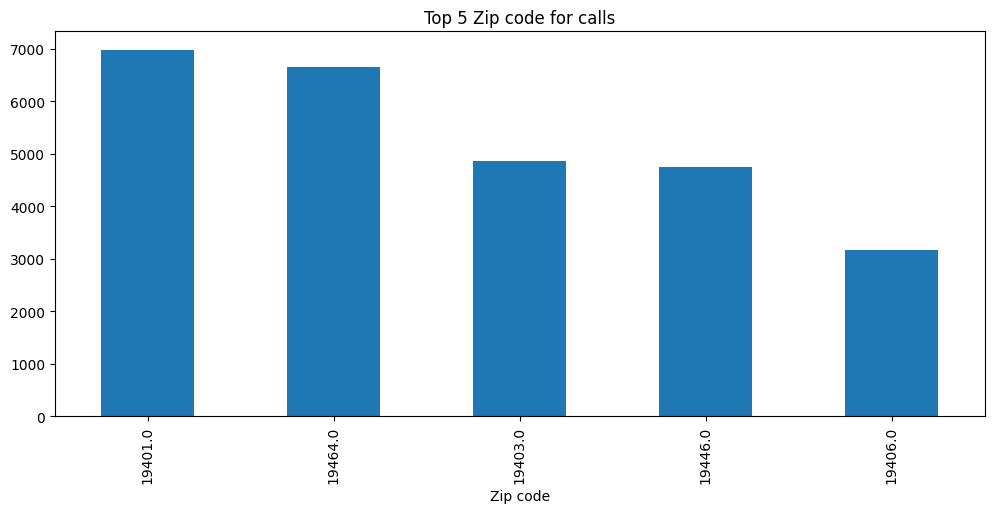

In [7]:
plt.figure(figsize=(12,5))
df.zip.value_counts().head(5).plot(kind='bar')
plt.title('Top 5 Zip code for calls')
plt.xlabel('Zip code')

# What are the top 5 townships (twp) for 911 calls?

In [8]:
df.twp.value_counts().head(5).reset_index()

,index,twp
0,LOWER MERION,8443
1,ABINGTON,5977
2,NORRISTOWN,5890
3,UPPER MERION,5227
4,CHELTENHAM,4575


Text(0.5, 0, 'Zip code')

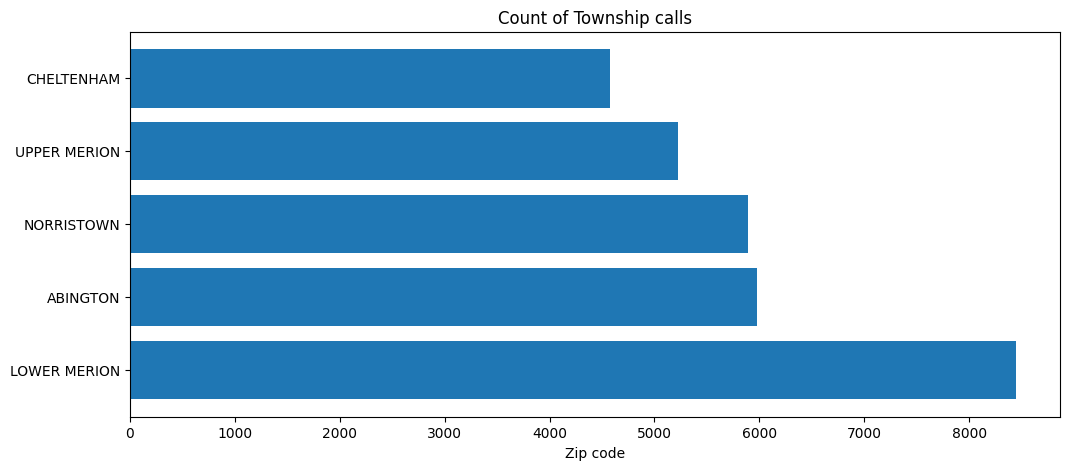

In [9]:
y = df.twp.value_counts().head(5).index
x = df.twp.value_counts().head(5)
plt.figure(figsize=(12,5))

plt.barh(y,x)
plt.title('Count of Township calls')
plt.xlabel('Zip code')

# how many unique title codes are there?

In [10]:
df['title'].nunique()

110

In [11]:
df['title'].head(2)

0     EMS: BACK PAINS/INJURY
1    EMS: DIABETIC EMERGENCY
Name: title, dtype: object

If you nitice in the string we have an information of reason like EMS which has to be spli and add in new column using the lambda funtion 

In [12]:
df['title'].apply(lambda x:str(x.split(':')[0]))

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: title, Length: 99492, dtype: object

In [13]:
df['reason'] = df['title'].apply(lambda x:str(x.split(':')[0]))

In [14]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [15]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

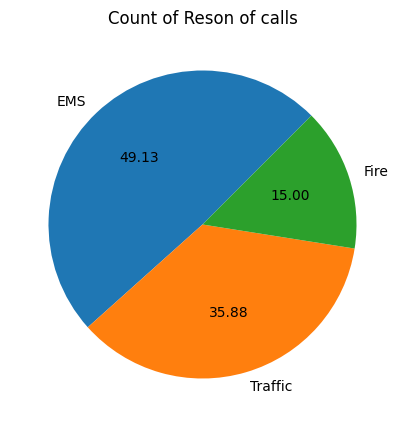

In [16]:
name = df['reason'].value_counts().index
num = df['reason'].value_counts()

# Lets use the chart type is Pie 
plt.figure(figsize=(10,5))
plt.pie(x=num,labels=name,data=df,startangle=45,autopct='%.2f')
plt.title('Count of Reson of calls')
plt.show()

so almost 50% of calls are EMS reasons 

Lets check the timestamp data

In [17]:
type(df.timeStamp.iloc[1])

str

In [18]:
df.timeStamp = pd.to_datetime(df['timeStamp'])

In [19]:
df['month'] = df.timeStamp.dt.month.astype(int)
df['hour'] = df.timeStamp.dt.hour.astype(int)
df['day'] = df.timeStamp.dt.day.astype(int)

In [20]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,month,hour,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,17,10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,17,10


In [21]:
df['day_of_week'] = df.timeStamp.dt.day_of_week.astype(int)


In [22]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

Lets map the day of week to day name as above

In [23]:
df['day_of_week'] = df['day_of_week'].map(dmap)

In [24]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,month,hour,day,day_of_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,17,10,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,17,10,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,12,17,10,Thu


# create a plot of the Day of Week column with the Reason column

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

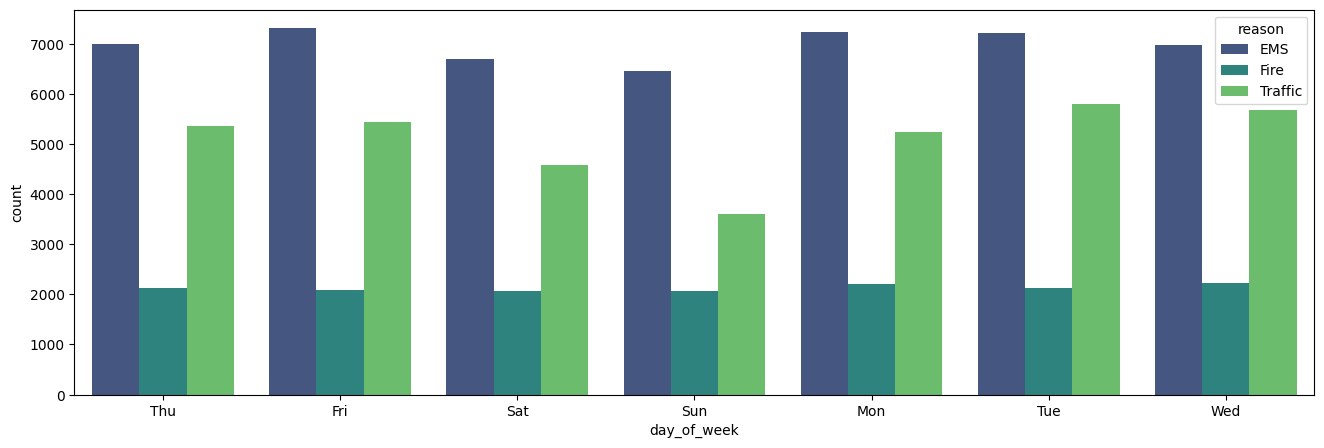

In [25]:
plt.figure(figsize=(16,5))
sns.countplot(x='day_of_week',data=df,hue='reason',palette='viridis')

Now do the same for Month chart

<AxesSubplot:xlabel='month', ylabel='count'>

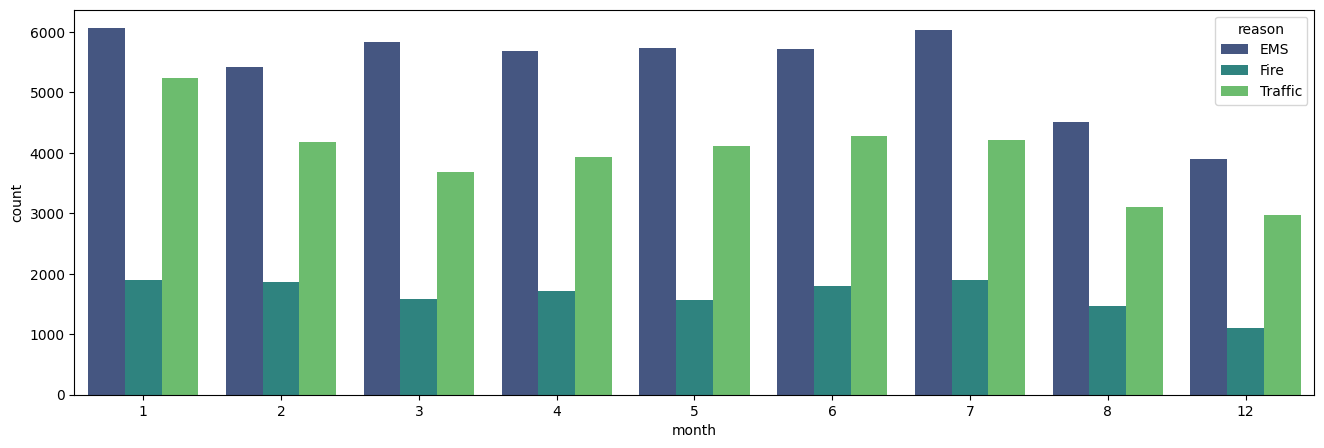

In [26]:
plt.figure(figsize=(16,5))
sns.countplot(x='month',data=df,hue='reason',palette='viridis')

Oh have you noticed the some month after the August are missing, we have to check the data 

In [27]:
monthdata = df.groupby('month').count()
monthdata.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day,day_of_week
month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


<AxesSubplot:xlabel='month'>

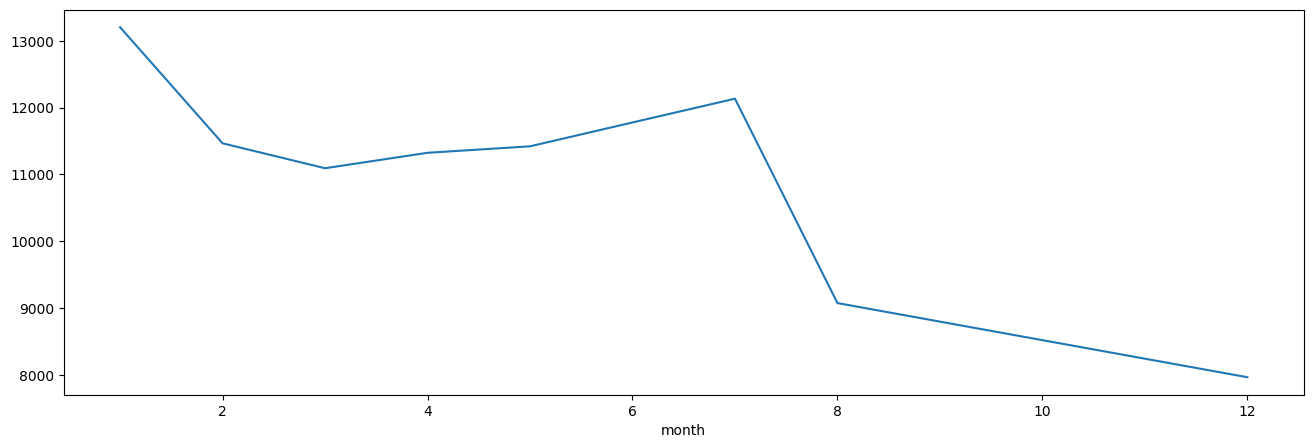

In [28]:
plt.figure(figsize=(16,5))
monthdata.twp.plot()

lets check the lmplot() and check the counts 

<Figure size 1600x500 with 0 Axes>

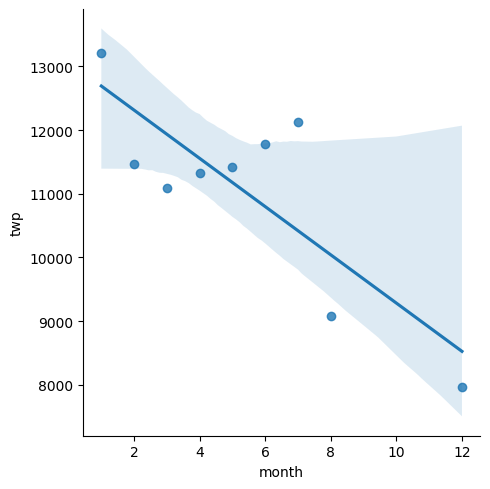

In [29]:
plt.figure(figsize=(16,5))
sns.lmplot(x='month',y='twp',data=monthdata.reset_index())

Lets check the date from original dataset

In [30]:
df.timeStamp.dt.date

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: timeStamp, Length: 99492, dtype: object

Lets create a New "Date" column in df dataset

In [31]:
df['date'] = df.timeStamp.dt.date

In [32]:
df.groupby('date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,month,hour,day,day_of_week
date,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389,389


<AxesSubplot:xlabel='date', ylabel='twp'>

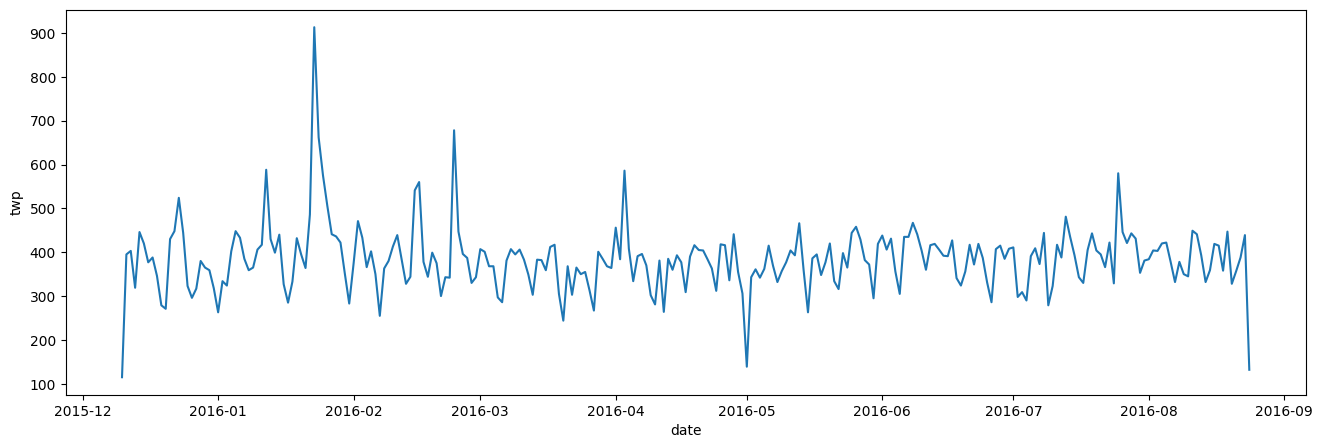

In [33]:
plt.figure(figsize=(16,5))
sns.lineplot(x=df.groupby('date').count().index,y=df.groupby('date').count()['twp'])

<AxesSubplot:xlabel='date'>

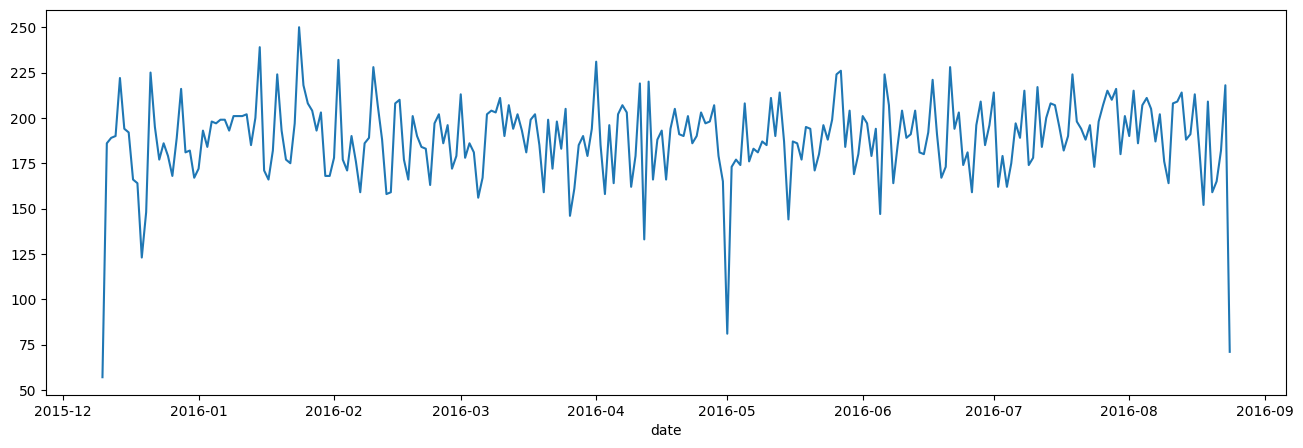

In [49]:
plt.figure(figsize=(16,5))
df[df['reason']=='EMS'].groupby('date').count()['twp'].plot()


<AxesSubplot:xlabel='date'>

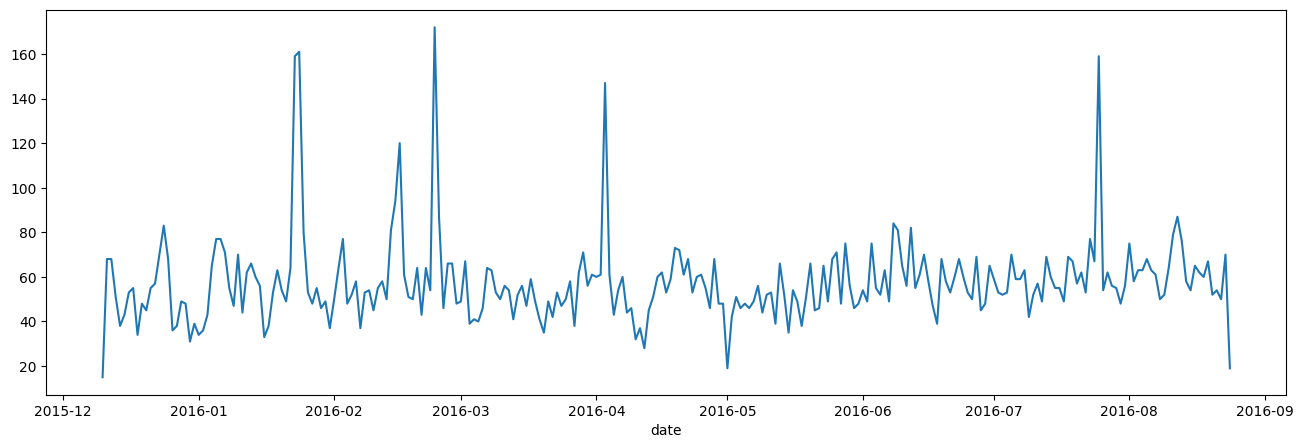

In [50]:
plt.figure(figsize=(16,5))
df[df['reason']=='Fire'].groupby('date').count()['twp'].plot()

<AxesSubplot:xlabel='date'>

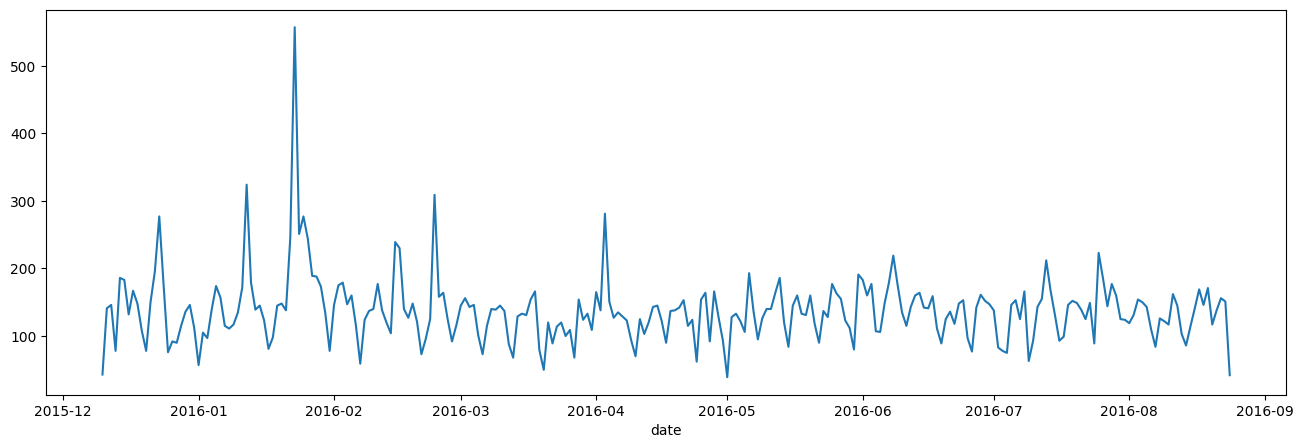

In [51]:
plt.figure(figsize=(16,5))
df[df['reason']=='Traffic'].groupby('date').count()['twp'].plot()

so we can see the trend of calls per day for different reasons

<AxesSubplot:>

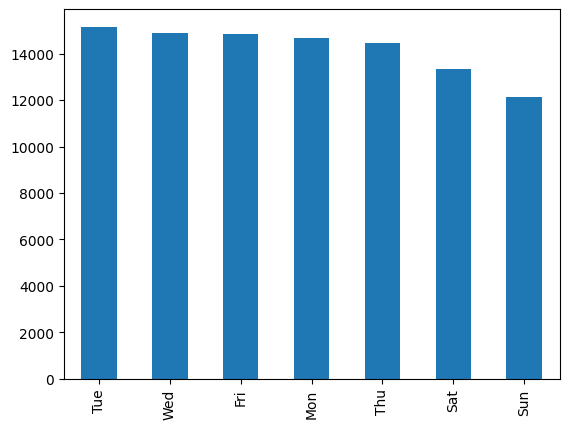

In [61]:
df.day_of_week.value_counts().head(10).plot(kind='bar')

In [56]:
df.month.value_counts().index

Int64Index([1, 7, 6, 2, 5, 4, 3, 8, 12], dtype='int64')

In [57]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,month,hour,day,day_of_week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,17,10,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,17,10,Thu,2015-12-10


In [73]:
dayHour = df.groupby(by=['day_of_week','hour']).count()['reason'].unstack()
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<AxesSubplot:xlabel='hour', ylabel='day_of_week'>

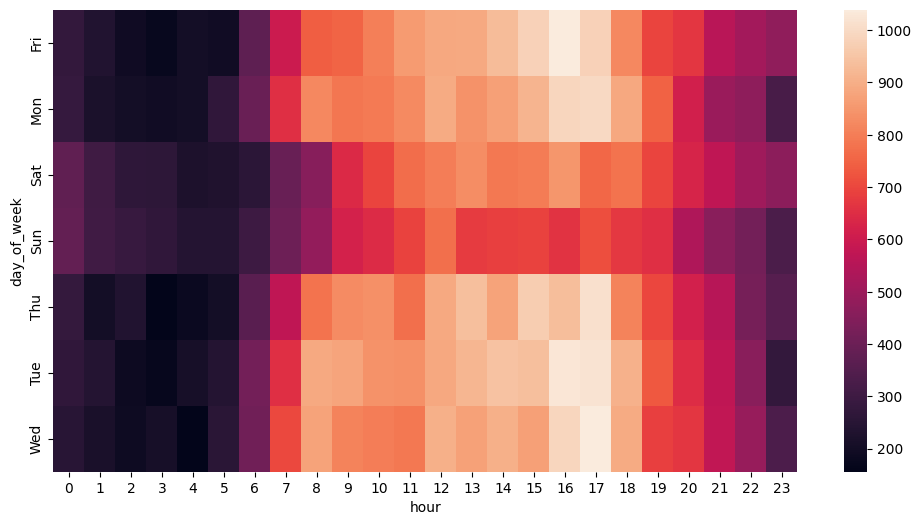

In [74]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour)

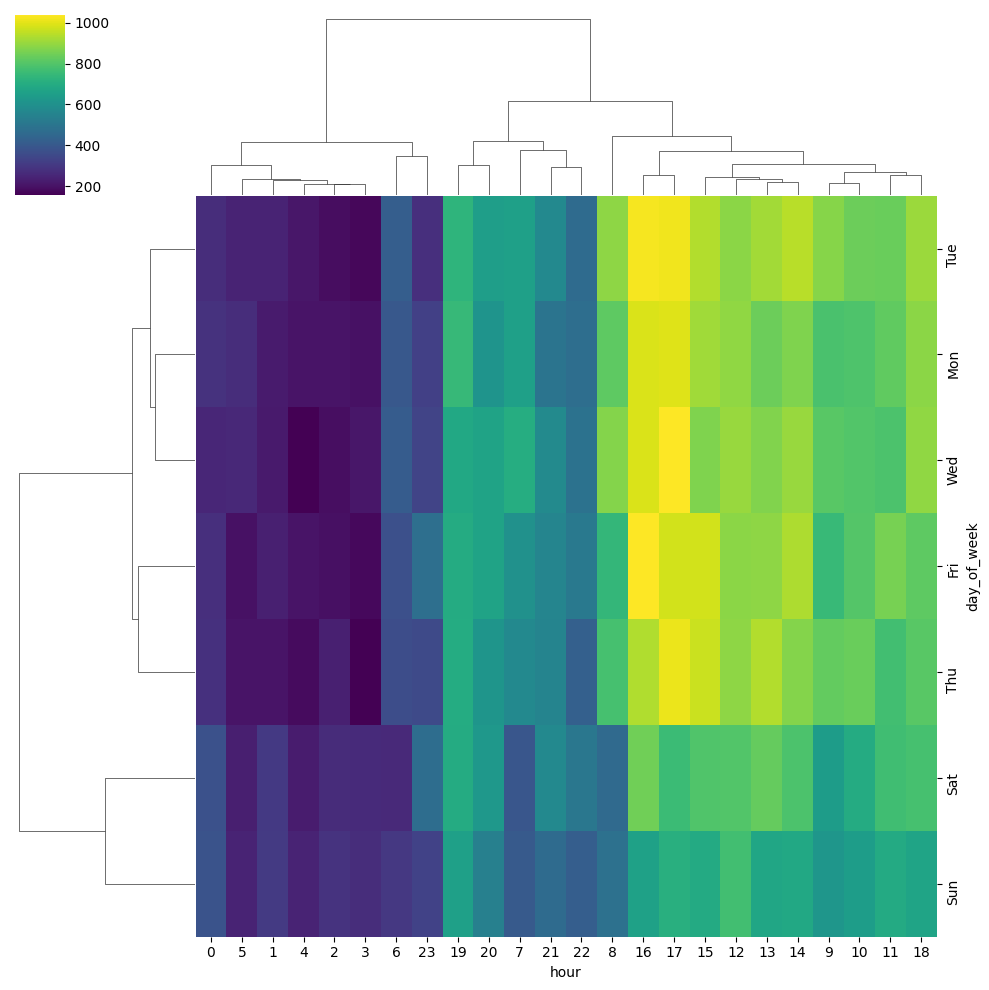

In [75]:
sns.clustermap(dayHour,cmap='viridis')

In [76]:
dayMonth = df.groupby(by=['day_of_week','month']).count()['reason'].unstack()
dayMonth.head()

month,1,2,3,4,5,6,7,8,12
day_of_week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='month', ylabel='day_of_week'>

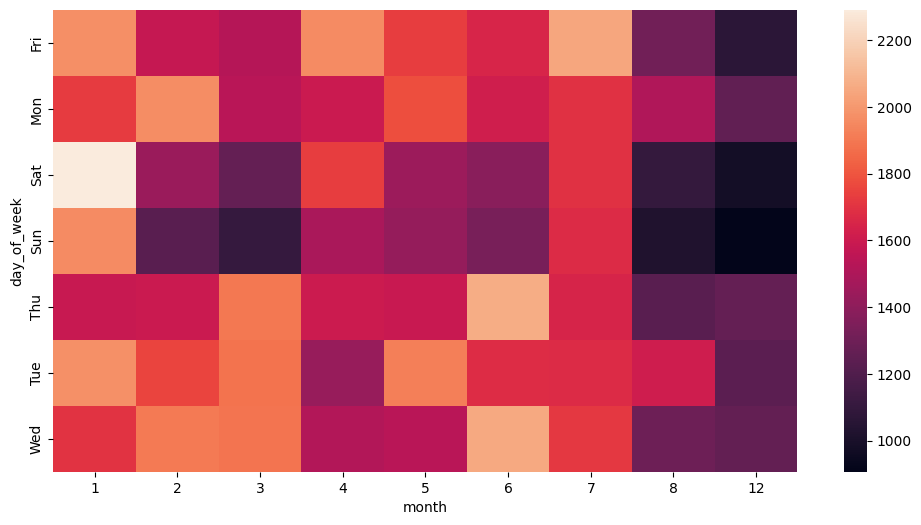

In [77]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth)